# **Exploratory Data Analysis of Flights Delay**

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data
flights = pd.read_csv('flights.csv')
flights.sample(5)

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
239842,2013,6,1,6,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,10140,Albuquerque International Sunport,Albuquerque,NM,2010,13,0.0,2055,9,0,0
106206,2013,7,29,1,US,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,11057,Charlotte Douglas International,Charlotte,NC,645,20,1.0,1025,11,0,0
53816,2013,4,11,4,WN,11259,Dallas Love Field,Dallas,TX,12191,William P Hobby,Houston,TX,1530,0,NaN,1635,0,1,1
144819,2013,7,15,1,UA,14771,San Francisco International,San Francisco,CA,14908,John Wayne Airport-Orange County,Santa Ana,CA,1215,-4,0.0,1348,-11,0,0
225693,2013,4,30,2,EV,11042,Cleveland-Hopkins International,Cleveland,OH,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,735,-6,0.0,853,-10,0,0


In [3]:
# Shape of the data
flights.shape

(271940, 20)

### **Data Cleaning**

### **Checking for null values**

In [4]:
flights.isna().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

#### **Dealing with Null Values in the DepDel15 Column**

In [5]:
# Unique Values in the DepDel15 column
flights.DepDel15.unique()

array([ 0.,  1., nan])

In [6]:
# Comparing the Departure delay to the DepDel15 column
flights[['DepDelay', 'DepDel15']].query('DepDel15.isnull()')

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


Rows where DepDel15 were null also had 0 for the DepDelay column, which means the departures were not delayed. We can confirm this using summary statistics

In [7]:
flights.query('DepDel15.isnull()')['DepDelay'].describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

The mean, max and min returns 0, confirming there were no delays

In [8]:
# Filling the null values in the DepDel15 column with 0 (0 denotes no late departures)
flights['DepDel15'].fillna(0, inplace= True)

In [9]:
# Confirming cleaning efforts
flights.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

### **Outliers**

In [10]:
# Checking for outliers in The ArrDelay and DepDelay columns
flights[['DepDelay', 'ArrDelay']].describe().round(2)

,DepDelay,ArrDelay
count,271940.00,271940.00
mean,10.35,6.50
std,35.67,38.23
min,-63.00,-75.00
25%,-4.00,-11.00
50%,-1.00,-3.00
75%,9.00,10.00
max,1425.00,1440.00


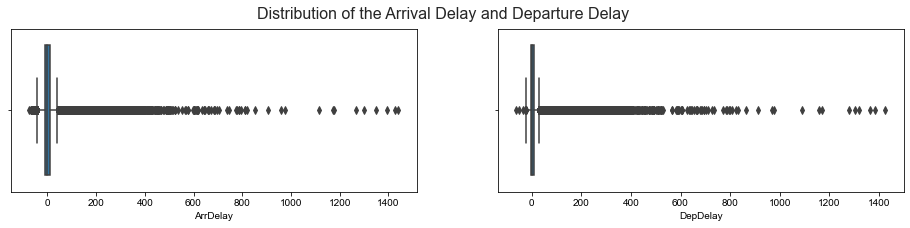

In [11]:
# Visualizing the distribution of the ArrDelay and DepDelay columns
fig, ax = plt.subplots(1, 2, figsize = (16,3))

sns.set_style('darkgrid')
sns.boxplot(ax= ax[0], x= 'ArrDelay', data=flights)

sns.boxplot(ax= ax[1], x= 'DepDelay', data=flights)

plt.suptitle('Distribution of the Arrival Delay and Departure Delay', size= 16)
plt.show()

#### **Dealing with Outliers in the ArrDelay and DepDelay Columns**

In [12]:
# Removing outliers below the 0.01% percentile and above the 90% percentile
q1= flights['DepDelay'].quantile(0.01)
q3= flights['DepDelay'].quantile(0.90)

flights= flights[flights.DepDelay < q3]
flights= flights[flights.DepDelay > q1]

flights= flights[flights.ArrDelay < q3]
flights= flights[flights.ArrDelay > q1]

In [13]:
# Shape of the dataset after removing outliers
flights.shape

(172184, 20)

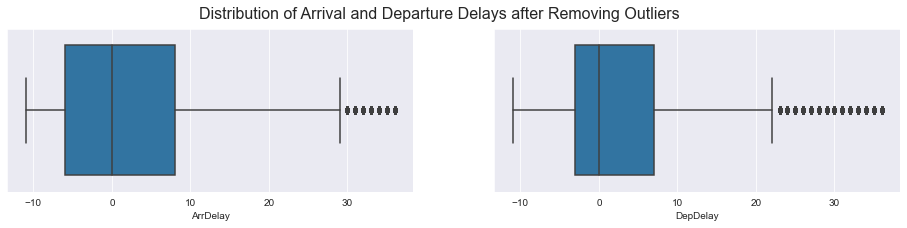

In [14]:
# Visualizing the columns post_outlier removal
fig, ax = plt.subplots(1, 2, figsize = (16,3))

sns.boxplot(ax= ax[0], x= 'ArrDelay', data=flights)

sns.boxplot(ax= ax[1], x= 'DepDelay', data=flights)

plt.suptitle('Distribution of Arrival and Departure Delays after Removing Outliers', size = 16)
plt.show()

In [15]:
# The New summary statistics of the data after removing the outliers
flights[['DepDelay', 'ArrDelay']].describe().round(2)

,DepDelay,ArrDelay
count,172184.00,172184.00
mean,3.04,2.14
std,9.77,10.54
min,-11.00,-11.00
25%,-3.00,-6.00
50%,0.00,0.00
75%,7.00,8.00
max,36.00,36.00


### **Correcting Data Types**

In [16]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172184 entries, 0 to 271938
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               172184 non-null  int64  
 1   Month              172184 non-null  int64  
 2   DayofMonth         172184 non-null  int64  
 3   DayOfWeek          172184 non-null  int64  
 4   Carrier            172184 non-null  object 
 5   OriginAirportID    172184 non-null  int64  
 6   OriginAirportName  172184 non-null  object 
 7   OriginCity         172184 non-null  object 
 8   OriginState        172184 non-null  object 
 9   DestAirportID      172184 non-null  int64  
 10  DestAirportName    172184 non-null  object 
 11  DestCity           172184 non-null  object 
 12  DestState          172184 non-null  object 
 13  CRSDepTime         172184 non-null  int64  
 14  DepDelay           172184 non-null  int64  
 15  DepDel15           172184 non-null  float64
 16  CR

In [17]:
# Creating a new column Days to contain the string version of Days of the week
flights['Days'] = flights['DayOfWeek'].replace({1: 'Monday', 
                                                2: 'Tuesday',
                                                3: 'Wednesday',
                                                4: 'Thursday',
                                                5: 'Friday',
                                                6: 'Saturday',
                                                7: 'Sunday'})

In [18]:
# Changing the DepDel15 column from float to whole number 
flights.DepDel15 = flights.DepDel15.astype(int)

## EDA

In [19]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172184 entries, 0 to 271938
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Year               172184 non-null  int64 
 1   Month              172184 non-null  int64 
 2   DayofMonth         172184 non-null  int64 
 3   DayOfWeek          172184 non-null  int64 
 4   Carrier            172184 non-null  object
 5   OriginAirportID    172184 non-null  int64 
 6   OriginAirportName  172184 non-null  object
 7   OriginCity         172184 non-null  object
 8   OriginState        172184 non-null  object
 9   DestAirportID      172184 non-null  int64 
 10  DestAirportName    172184 non-null  object
 11  DestCity           172184 non-null  object
 12  DestState          172184 non-null  object
 13  CRSDepTime         172184 non-null  int64 
 14  DepDelay           172184 non-null  int64 
 15  DepDel15           172184 non-null  int32 
 16  CRSArrTime         1

#### **Summary Statistics of Numeric columns**

In [20]:
cols = ['ArrDelay', 'DepDelay']
flights[cols].describe()

,ArrDelay,DepDelay
count,172184.000000,172184.000000
mean,2.137731,3.044214
std,10.537858,9.766441
min,-11.000000,-11.000000
25%,-6.000000,-3.000000
50%,0.000000,0.000000
75%,8.000000,7.000000
max,36.000000,36.000000


In [21]:
# Number of delayed and undelayed departure flights. 0 denotes undelayed while 1 denotes delayed
flights.ArrDel15.value_counts()

0    145222
1     26962
Name: ArrDel15, dtype: int64

In [22]:
# Number of delayed and undelayed departure flights. 0 denotes undelayed while 1 denotes delayed
flights.DepDel15.value_counts()

0    148356
1     23828
Name: DepDel15, dtype: int64

In [23]:
# Number of cancelled and uncancelled flights. 0 denotes uncancelled while 1 denotes cancelled
flights.Cancelled.value_counts()

0    169330
1      2854
Name: Cancelled, dtype: int64

### **Average Arrival and Departure Delays**

**What are the average (mean) departure and arrival delays?**

In [24]:
mean= flights[['ArrDelay', 'DepDelay']].mean().to_frame().reset_index().rename(columns= {'index': 'Delays', 0: 'Mean'})
mean

,Delays,Mean
0,ArrDelay,2.137731
1,DepDelay,3.044214


### **Histogram showing the distribution of the Arrival and Departure Delays**

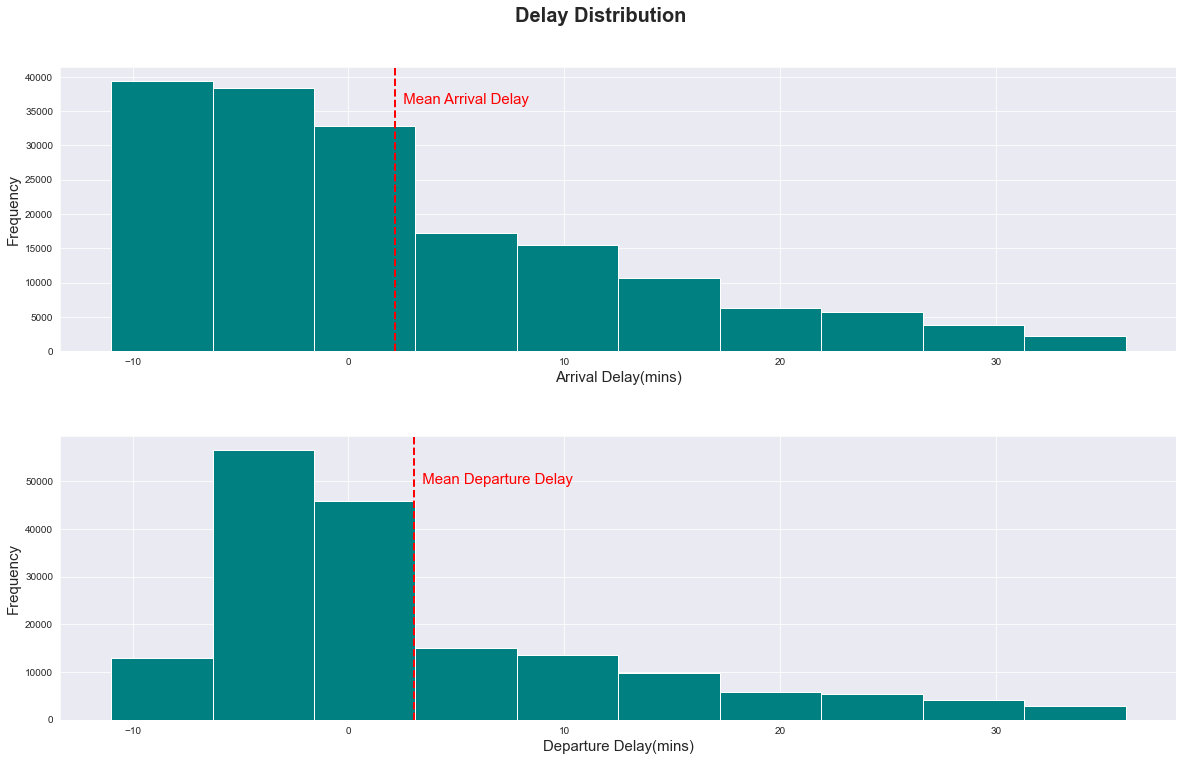

In [40]:
fig, ax= plt.subplots(2, 1, figsize = (20, 12))  # Creating two plots


# Distribution of the Arrival Delay
ax[0].hist(x= flights['ArrDelay'], color= 'teal', bins= 10)
ax[0].axvline(flights['ArrDelay'].mean(), color='r', linestyle='dashed', linewidth= 2) # Adding the mean
ax[0].set_xlabel('Arrival Delay(mins)', fontsize= 15)
ax[0].set_ylabel('Frequency', fontsize= 15)
ax[0].text(mean['Mean'][0], 36000, '  Mean Arrival Delay', color= 'r', fontsize= 15) # Annotating the mean

# Distribution of the Departure Delay
ax[1].hist(x= flights['DepDelay'], color= 'teal', bins= 10)
ax[1].axvline(flights['DepDelay'].mean(), color='r', linestyle='dashed', linewidth= 2) # Adding the mean
ax[1].set_xlabel('Departure Delay(mins)', fontsize= 15)
ax[1].set_ylabel('Frequency', fontsize= 15)
ax[1].text(mean['Mean'][1], 49500, '  Mean Departure Delay', color= 'r', fontsize= 15) # Annotating the mean

plt.subplots_adjust(hspace= 0.3)
fig.suptitle('Delay Distribution', fontweight= 'bold',fontsize= 20, y= 0.95) #Adding Chart Title
plt.show()

### **Delay Performance by Carriers**

**How do the carriers compare in terms of arrival and departure delay performance?**

In [26]:
flights.groupby('Carrier')['ArrDelay'].mean().sort_values(ascending= False)

Carrier
F9    3.443530
MQ    3.169416
WN    2.892873
FL    2.640635
B6    2.538991
AA    2.311627
UA    2.267846
US    2.157454
EV    1.926864
AS    1.925770
VX    1.708393
OO    1.436321
YV    1.270804
9E    0.988993
DL    0.747542
HA    0.072785
Name: ArrDelay, dtype: float64

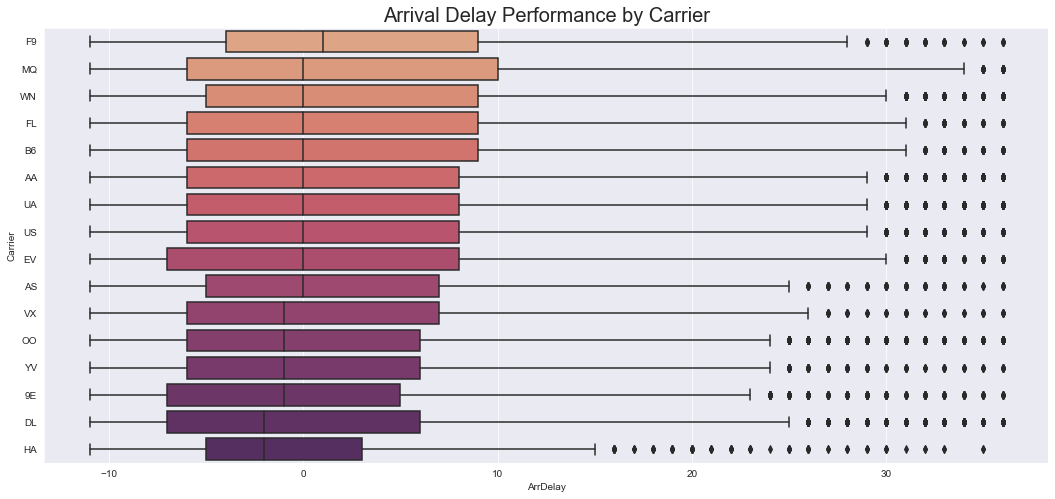

In [27]:
# Visualizing the Arrival Delay by carriers
plt.figure(figsize= (18, 8))

order = flights.groupby('Carrier')['ArrDelay'].mean().sort_values(ascending= False).index # Sorting by the arrival delay mean 

sns.boxplot(y= 'Carrier', x= 'ArrDelay', data= flights, order= order, palette= 'flare')
plt.title('Arrival Delay Performance by Carrier', size= 20)

plt.show()

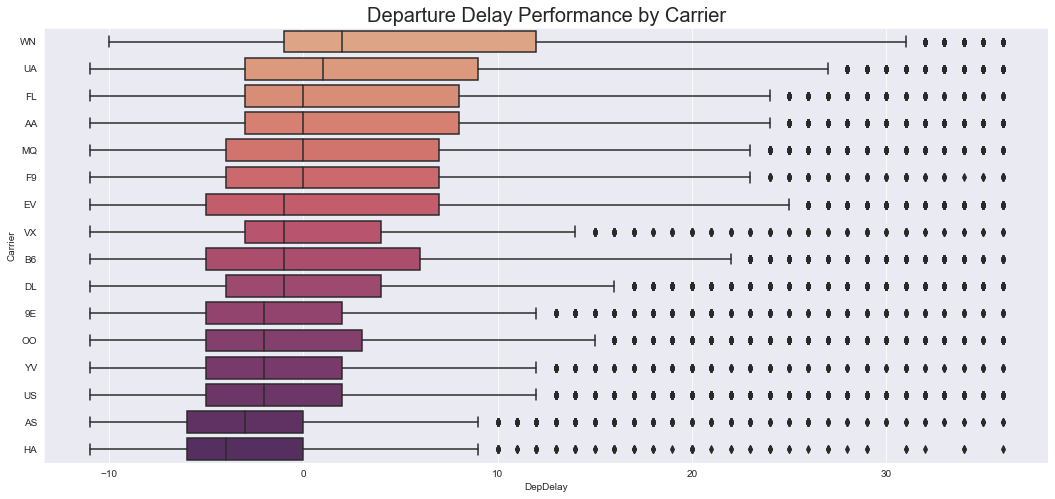

In [28]:
# Visualizing the Departure Delay by carriers
plt. figure(figsize= (18, 8))

ord = flights.groupby('Carrier')['DepDelay'].mean().sort_values(ascending= False).index # Sorting by the arrival delay mean 

sns.boxplot(y= 'Carrier', x= 'DepDelay', data= flights, order = ord, palette= 'flare')
plt.title('Departure Delay Performance by Carrier', size= 20)

plt.show()

### **Arrival Delay for Diffferent Days of the Week**

**Is there a noticable difference in arrival and departure delays for different days of the week?**

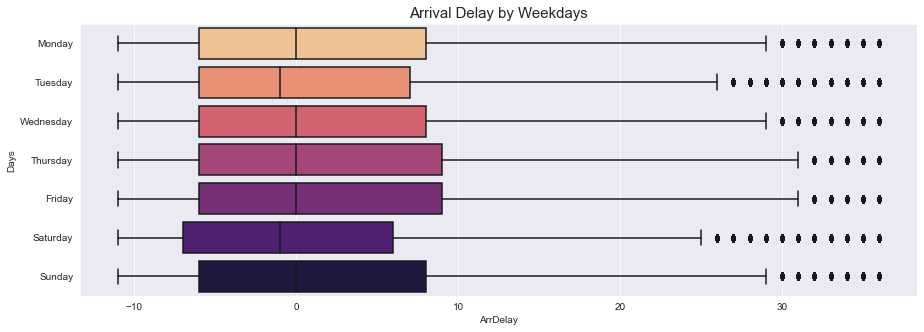

In [29]:
# Visualizing the Arrival Delay for different days of the week
plt.figure(figsize= (15, 5))

days_sort = flights.groupby('Days')['DayOfWeek'].unique().sort_values().index

sns.boxplot(y= 'Days', x= 'ArrDelay', data= flights, order= days_sort, palette= 'magma_r')
plt.title('Arrival Delay by Weekdays', size= 15)

plt.show()

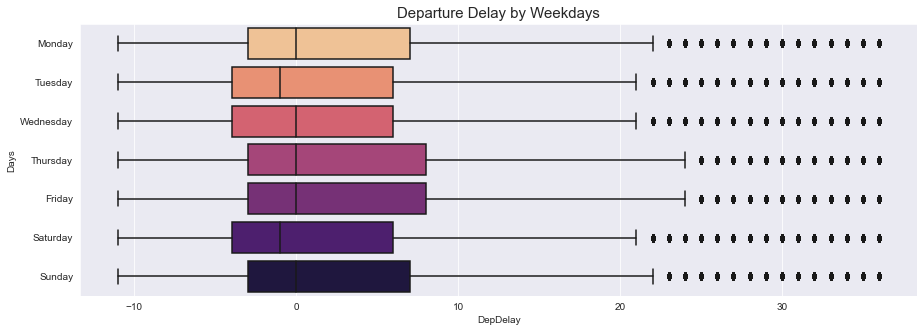

In [30]:
# Visualizing the Departure Delay for different days of the week
plt.figure(figsize= (15, 5))

days_sort = flights.groupby('Days')['DayOfWeek'].unique().sort_values().index

sns.boxplot(y= 'Days', x= 'DepDelay', data= flights, order= days_sort, palette= 'magma_r')
plt.title('Departure Delay by Weekdays', size= 15)

plt.show()

### **Average Departure Delay by Airports**

**Which departure airport has the highest average departure delay?**

In [31]:
Airport_DepDelay = flights.groupby('OriginAirportName')['DepDelay'].mean()\
.sort_values(ascending= False).to_frame().reset_index()

Airport_DepDelay.rename(columns= {'OriginAirportName': 'Airport','DepDelay': 'Avg Departure Delay'}, inplace= True)
Airport_DepDelay.head(10)

,Airport,Avg Departure Delay
0,Chicago Midway International,7.772280
1,William P Hobby,6.034343
2,Baltimore/Washington International Thurgood Ma...,5.778911
3,Dallas Love Field,5.559733
4,Denver International,5.125803
5,Dallas/Fort Worth International,4.817937
6,McCarran International,4.809639
7,Hartsfield-Jackson Atlanta International,4.491917
8,Metropolitan Oakland International,4.476214
9,Lambert-St. Louis International,4.095238


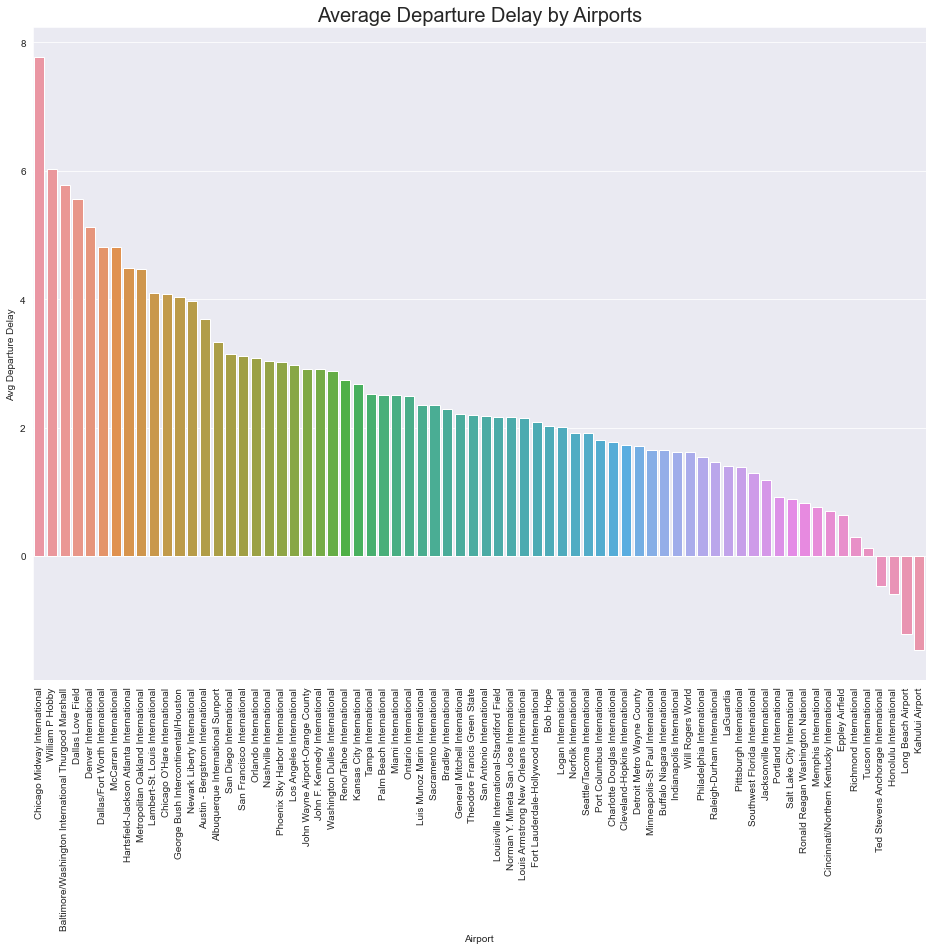

In [32]:
## Visualizing the Average Departure Delay by Airports
plt.figure(figsize= (16, 12))
sns.barplot(x= 'Airport', y= 'Avg Departure Delay', data= Airport_DepDelay)
plt.xticks(rotation=90)
plt.title('Average Departure Delay by Airports', size= 20)

plt.show()

### **Effect on Late Departure on Arrival Delays**

**Do late departures tend to result in longer arrival delays than on-time departures?**

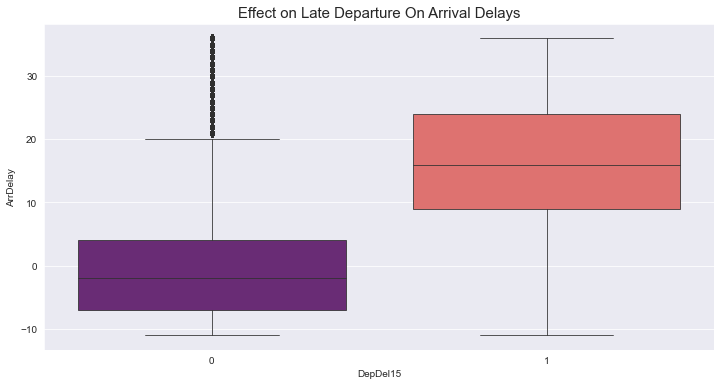

In [33]:
plt.figure(figsize= (12, 6))
sns.boxplot(x= 'DepDel15', y= 'ArrDelay', data= flights, palette= 'magma', linewidth= 0.8)
plt.title('Effect on Late Departure On Arrival Delays', size= 15)
plt.show()

### **Airport Routes**

In [34]:
# Creating Route column by concatenating the Origin Airport and the Destination Airport
flights['Route'] = flights['OriginAirportName'] + ' --- ' + flights['DestAirportName']

### **Airports by late arrivals**

**Which route (from origin airport to destination airport) has the most late arrivals?**

In [35]:
flights.groupby('Route').agg({'ArrDel15': 'sum'}).sort_values('ArrDel15', ascending= False)

,ArrDel15
Route,
San Francisco International --- Los Angeles International,145
Los Angeles International --- San Francisco International,123
LaGuardia --- Hartsfield-Jackson Atlanta International,87
McCarran International --- Los Angeles International,86
Los Angeles International --- McCarran International,78
...,...
Philadelphia International --- Austin - Bergstrom International,0
Palm Beach International --- Ronald Reagan Washington National,0
Theodore Francis Green State --- Minneapolis-St Paul International,0


### **Airports by Average Arrival Delay**

**Which route has the highest average arrival delay?**

In [36]:
flights.groupby('Route').agg({'ArrDelay': 'mean'}).sort_values('ArrDelay', ascending= False)

,ArrDelay
Route,
Southwest Florida International --- Buffalo Niagara International,27.000000
Louis Armstrong New Orleans International --- Ronald Reagan Washington National,25.333333
Newark Liberty International --- Will Rogers World,20.333333
Cleveland-Hopkins International --- Palm Beach International,18.000000
Buffalo Niagara International --- Southwest Florida International,18.000000
...,...
Pittsburgh International --- Nashville International,-8.000000
Palm Beach International --- Chicago Midway International,-8.000000
Phoenix Sky Harbor International --- Cleveland-Hopkins International,-8.500000


### **On what days do flights get cancelled more?**

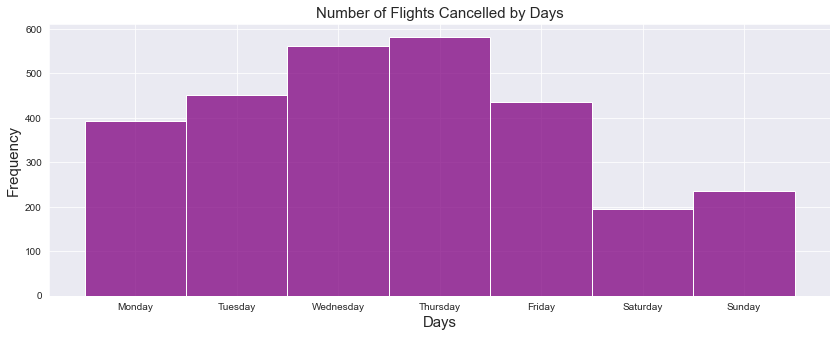

In [37]:
a = flights.query('Cancelled == 1')

a['Days'] = pd.Categorical(a['Days'],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize= (14, 5))

sns.histplot(x= 'Days', data= a, color= 'purple')
plt.title('Number of Flights Cancelled by Days', size= 15)
plt.xlabel('Days', fontsize= 15)
plt.ylabel('Frequency', fontsize= 15)

plt.show()

# **Findings**

**1.** Flights whose departures were delayed arrived late compared to those that departed on time. This is apparent because if a flight doesn't depart from its origin airport on time, it is sure to arrive at the destination airport late. These delays range from 10 - 20 or more minutes.

**2.** Flights Departures are delayed more on weekdays than on weekends with delays falling mostly on Thursdays and Fridays. Thursdays and Fridays also account for days when arrivals are mostly delayed. This is because if more flights are getting delayed on these days, the flights will also arrival late as arrival delay is dependent on departure delay.


**3.** Flights are cancelled most on Wesnesdays and Thursdays.


**4.** The Top five routes where flights are delayed are

    - San Francisco International --- Los Angeles International
    - Los Angeles International --- San Francisco International
    - LaGuardia --- Hartsfield-Jackson Atlanta International
    - McCarran International --- Los Angeles International
    - Los Angeles International --- McCarran International
    


**5.** A large portion of the carriers are guilty in both departure and arrival delays. Although fewer carriers depart late compared to arriving late.